# Sprint 機械学習フロー

## 【問題1】クロスバリデーション

### ＜前処理＞

In [80]:
import pandas as pd
# データ読込
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')

In [81]:
# 半分以上 欠損地を含む列を削除
drop_df = df_train.dropna(thresh=df_train.shape[0]*0.5, axis=1)

# 欠損地を含む行を削除
drop_df = drop_df.dropna(axis=0)

In [82]:
# ワンホットエンコーディング
df_one_hot_encoded = pd.get_dummies(drop_df)

In [83]:
# 相関係数の算出
df_corr = df_one_hot_encoded.corr()

In [84]:
# TARGETとの相関係数上位１０項目を抽出
df_corr["TARGET"].sort_values(ascending=False)

TARGET                                               1.000000
DAYS_EMPLOYED                                        0.067902
DAYS_BIRTH                                           0.061618
NAME_EDUCATION_TYPE_Secondary / secondary special    0.054697
REGION_RATING_CLIENT_W_CITY                          0.050473
                                                       ...   
NAME_EDUCATION_TYPE_Higher education                -0.058496
EXT_SOURCE_2                                        -0.152174
EXT_SOURCE_3                                        -0.169535
FLAG_MOBIL                                                NaN
FLAG_DOCUMENT_2                                           NaN
Name: TARGET, Length: 189, dtype: float64

In [85]:
# TARGETとの相関係数上位１０項目を抽出(相関関係の正負も考慮し、絶対値を取る)
abs(df_corr["TARGET"]).sort_values(ascending=False)[0:11].index

Index(['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_EMPLOYED', 'DAYS_BIRTH',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'FLOORSMAX_AVG',
       'FLOORSMAX_MEDI'],
      dtype='object')

In [86]:
# 上位１０項目で再度相関係数を出しなおす。
new_df = df_one_hot_encoded[abs(df_corr["TARGET"]).sort_values(ascending=False)[0:11].index]
new_df_corr = new_df.corr()
new_df_corr

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_EMPLOYED,DAYS_BIRTH,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLOORSMAX_AVG,FLOORSMAX_MEDI
TARGET,1.000000,-0.169535,-0.152174,0.067902,0.061618,-0.058496,0.054697,0.050473,0.048078,-0.046205,-0.046030
EXT_SOURCE_3,-0.169535,1.000000,0.118087,-0.125235,-0.179898,-0.005739,0.027195,-0.002365,-0.003040,0.003699,0.003985
EXT_SOURCE_2,-0.152174,0.118087,1.000000,-0.088711,-0.140273,0.110212,-0.095934,-0.284964,-0.295872,0.125559,0.124219
DAYS_EMPLOYED,0.067902,-0.125235,-0.088711,1.000000,0.348787,0.017198,-0.044498,-0.022239,-0.023906,0.003278,0.003263
DAYS_BIRTH,0.061618,-0.179898,-0.140273,0.348787,1.000000,0.077791,-0.134095,0.030587,0.032088,-0.013425,-0.013167
NAME_EDUCATION_TYPE_Higher education,-0.058496,-0.005739,0.110212,0.017198,0.077791,1.000000,-0.898646,-0.040935,-0.042366,0.140492,0.140034
NAME_EDUCATION_TYPE_Secondary / secondary special,0.054697,0.027195,-0.095934,-0.044498,-0.134095,-0.898646,1.000000,0.046928,0.047650,-0.141361,-0.140970
REGION_RATING_CLIENT_W_CITY,0.050473,-0.002365,-0.284964,-0.022239,0.030587,-0.040935,0.046928,1.000000,0.924737,-0.227591,-0.224935
REGION_RATING_CLIENT,0.048078,-0.003040,-0.295872,-0.023906,0.032088,-0.042366,0.047650,0.924737,1.000000,-0.212323,-0.209644
FLOORSMAX_AVG,-0.046205,0.003699,0.125559,0.003278,-0.013425,0.140492,-0.141361,-0.227591,-0.212323,1.000000,0.997143


In [87]:
# 説明変数
new_df_X = new_df.iloc[:,1:11]
new_df_X

,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_EMPLOYED,DAYS_BIRTH,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLOORSMAX_AVG,FLOORSMAX_MEDI
0,0.139376,0.262949,-637,-9461,0,1,2,2,0.0833,0.0833
12,0.176653,0.715042,-2717,-13439,0,1,2,2,0.1667,0.1667
13,0.770087,0.566907,-3028,-14086,0,1,2,2,0.3333,0.3333
18,0.556727,0.706428,-7804,-17718,0,1,1,1,0.0833,0.0833
22,0.358951,0.457143,-4306,-11146,0,1,2,3,0.1667,0.1667
...,...,...,...,...,...,...,...,...,...,...
307495,0.597192,0.267834,-7438,-20922,1,0,2,2,0.3333,0.3333
307498,0.406617,0.746259,-3689,-19102,0,1,1,1,0.6667,0.6667
307508,0.218859,0.535722,-7921,-14966,1,0,3,3,0.1667,0.1667
307509,0.661024,0.514163,-4786,-11961,0,1,2,2,0.0417,0.0417


In [88]:
# 説明変数
new_df_y = new_df.iloc[:,0]
new_df_y

0         1
12        0
13        0
18        0
22        0
         ..
307495    0
307498    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 84575, dtype: int64

In [89]:
import numpy as np
# ndarrayへ変換
X = np.array(new_df_X)
y = np.array(new_df_y)

In [90]:
y.shape

(84575,)

In [91]:
from sklearn.preprocessing import StandardScaler
# 標準化
ss_base = StandardScaler()
ss_base.fit(X)
ss_X = ss_base.transform(X)

    

### ＜クロスバリデーション＞

In [92]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)
kf.get_n_splits(X)

4

In [93]:
print(kf)

KFold(n_splits=4, random_state=None, shuffle=False)


In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

result = []
# データ分割
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    # 標準化
    ss = StandardScaler()
    ss.fit(X_train)
    ss_X_train = ss.transform(X_train)
    ss_X_test = ss.transform(X_test)
    
    # LinearRegression
    model_LR= LR()
    model_LR.fit(ss_X_train, y_train)

    # 標準化済みのX_testで予測を行う。
    y_pred_LR = model_LR.predict(ss_X_test)
    print("y_pred_LR:{}".format(y_pred_LR))
    #result.append(y_pred_LR)
    
    # LinearRegression
    fpr_LR, tpr_LR, thresholds = metrics.roc_curve(y_test, y_pred_LR, pos_label=1)

    auc_LR = metrics.auc(fpr_LR, tpr_LR)
    auc_LR
    
    result.append(auc_LR)
    


avg_AUC = sum(result)/len(result)
avg_AUC

TRAIN: [21144 21145 21146 ... 84572 84573 84574] TEST: [    0     1     2 ... 21141 21142 21143]
y_pred_LR:[0.22546573 0.12384463 0.01961457 ... 0.07966373 0.00169124 0.04530864]
TRAIN: [    0     1     2 ... 84572 84573 84574] TEST: [21144 21145 21146 ... 42285 42286 42287]
y_pred_LR:[0.01138529 0.02114578 0.09528127 ... 0.02855614 0.07098779 0.04050658]
TRAIN: [    0     1     2 ... 84572 84573 84574] TEST: [42288 42289 42290 ... 63429 63430 63431]
y_pred_LR:[0.00646252 0.05436471 0.1690645  ... 0.10861745 0.02607257 0.14681411]
TRAIN: [    0     1     2 ... 63429 63430 63431] TEST: [63432 63433 63434 ... 84572 84573 84574]
y_pred_LR:[0.10689427 0.0566584  0.09203495 ... 0.10266422 0.05805886 0.10248436]


0.7282775824020655

In [96]:
np.mean(result)

0.7282775824020655

## 【問題2】グリッドサーチ

In [99]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

svc = svm.SVC(max_iter = 200, gamma='auto', probability = True)
clf = GridSearchCV(svc, parameters, cv = 4)

# 標準化済みデータで学習
clf.fit(ss_X, y)

C:\Users\Takatoshi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Takatoshi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Takatoshi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Takatoshi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Takatoshi\Anaco

GridSearchCV(cv=4, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=200,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [100]:
best_clf = clf.best_estimator_

In [101]:
clf.cv_results_

{'mean_fit_time': array([2.36973655, 4.97099608, 1.86883318, 4.99807942]),
 'std_fit_time': array([0.03283038, 0.04312852, 0.08090139, 0.10277723]),
 'mean_score_time': array([0.06382722, 0.16381127, 0.04612583, 0.14652818]),
 'std_score_time': array([0.00173859, 0.00792814, 0.00333892, 0.00795704]),
 'param_C': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'}],
 'split0_test_score': array([0.18279417, 0.82756337, 0.40692395, 0.59473137]),
 'split1_test_score': array([0.26608021, 0.86823685, 0.55107832, 0.62348657]),
 'split2_test_score': array([0.27014756, 0.78532917, 0.63502649, 0.87902005]),
 'split

In [102]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [103]:
clf.best_score_

0.8464919698079931

In [108]:
# 最良の学習結果を算出
y_pred = best_clf.predict(ss_X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y, y_pred, pos_label=1)

auc = metrics.auc(fpr, tpr)
print("GridSerchのbestでのAUC = {}".format(auc))

GridSerchのbestでのAUC = 0.46452654045976993


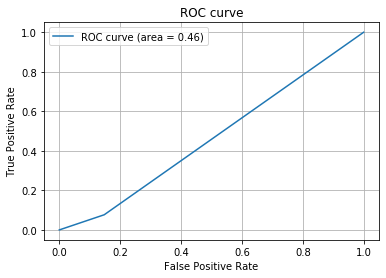

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [24]:
# predict_probaで確率をだす。
y_predict_proba = best_clf.predict_proba(X)
print("y_predict_proba = \n{}".format(y_predict_proba))

y_predict_proba = 
[[0.88587875 0.11412125]
 [0.88587875 0.11412125]
 [0.88587875 0.11412125]
 ...
 [0.88587875 0.11412125]
 [0.88587875 0.11412125]
 [0.88587875 0.11412125]]


## 【問題3】Kaggle Notebooksからの調査
KaggleのNotebooksから様々なアイデアを見つけ出して、列挙してください。

勾配ブースティング  
アンサンブル学習  
・XGBoost  
・LightGBM  
・CatBoost  
・DeepLearning  
・Tree Parzen Esimator  
・Optuna

機械学習のコミュニティで世界的に有名なKDnuggetsによると、Kaggleで上位ランキングを取った半数以上もの勝者が「勾配ブースティング」を使った実績があると報じています。それほど勾配ブースティングは注目度の高い機械学習手法であり、今日のデータ分析競技には必須とも言える存在なのです。

## 【問題4】高い汎化性能のモデル作成

### ＜GridSearch + LightGBM使ってみた＞

In [25]:
! pip install lightgbm

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ss_X, y, train_size = 0.8)

In [242]:
import lightgbm as lgb

#モデルの作成、各種ハイパラメータの指定
bst = lgb.LGBMRegressor(
                        num_leaves = 31,
                        learning_rate=0.01,
                        min_child_samples=10,
                        n_estimators=1000,
                        max_depth=-1,
                        )

In [243]:
# LightGBM のハイパーパラメータ
grid_param ={'max_depth':[2,4],
             'num_leaves':[9,7,5],
             'learning_rate':[0.05,0.04],
            }

# early_stoppingを使いたいので以下のような辞書をモデルを訓練する際に渡してやります。
fit_params={'early_stopping_rounds':10, 
            'eval_metric' : 'auc', 
            'eval_set' : [(ss_X, y)],
           }

In [ ]:
bst_gs_cv = GridSearchCV(
            bst,
            grid_param, 
            cv = 5, 
            scoring = 'roc_auc',
            verbose = 0
            )

bst_gs_cv.fit(
            ss_X, 
            y,
            **fit_params,
            verbose = 10
            )


In [245]:

best_param = bst_gs_cv.best_params_
print('Best parameter: {}'.format(best_param))

'''
pred2 = bst_gs_cv.predict(X)
RMSE2 = np.sqrt(mean_squared_error(pred2, y))
print('GridSearchCV RMSE:{}'.format(RMSE2))
'''
bast_score = bst_gs_cv.best_score_

best_clf = bst_gs_cv.best_estimator_

y_pred_lgbm = best_clf.predict(ss_X)



fpr_LGBM, tpr_LGBM, thresholds_LGBM = metrics.roc_curve(y, y_pred_lgbm, pos_label=1)

auc_LGBM = metrics.auc(fpr_LGBM, tpr_LGBM)
print("lightGBMのAUC = {}".format(auc_LGBM))



Best parameter: {'learning_rate': 0.04, 'max_depth': 2, 'num_leaves': 9}
lightGBMのAUC = 0.7462694452117009


### 普通にGridSearchCVを使った場合と比べて、LightGBMを使った方が精度が良くなった。

### <Optuna + LBGM使ってみた>

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ss_X, y, train_size = 0.8)

In [68]:
X_test.shape

(16915, 10)

In [69]:
y_test.shape

(16915,)

#### Optuna の拡張機能 LightGBM Tuner によるハイパーパラメータ自動最適化
https://tech.preferred.jp/ja/blog/hyperparameter-tuning-with-optuna-integration-lightgbm-tuner/

In [235]:
import optuna
import optuna.integration.lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate


dtrain = lgb.Dataset(X_train, label=y_train)
dtest = lgb.Dataset(X_test, label=y_test)

def objective(trial):
    
    param ={
                'objective': 'binary',
                'metric': 'auc',
                'num_leaves': trial.suggest_int('num_leaves', 5, 9),
                'max_depth': trial.suggest_int('max_depth', 2, 6),
                'learning_rate':trial.suggest_uniform('learning_rate', 0.01, 0.06) # 0.01～0.06  
            }
    
    # ハイパーパラメータのチューニング
    best_params, tuning_history = dict(), list()
    gbm = lgb.train(param, 
                    dtrain, 
                    valid_sets=dtest,
                    verbose_eval=100,
                    best_params=best_params,
                    tuning_history=tuning_history,
                   )
    
    print('Best Params:', best_params)
    print('Tuning history:', tuning_history)
    
    y_preds = gbm.predict(X_test)
    pred_labels = np.rint(y_preds)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds, pos_label=1)

    AUC = metrics.auc(fpr, tpr)
    
    # 最大化したいスコアを返す
    return AUC



In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)
 
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

print('\nBest Params:', study.best_params)
#print('Tuning history:', study.tuning_history)

In [237]:
print('Best Params:', study.best_params)
print('\nBest best_value:', study.best_value)

Best Params: {'num_leaves': 5, 'max_depth': 4, 'learning_rate': 0.03637255922912813}

Best best_value: 0.738014284738066


In [246]:
import lightgbm as lgb_original

# GridSerch + LGBM での結果 （再掲）
best_clf = bst_gs_cv.best_estimator_

y_pred_lgbm = best_clf.predict(ss_X)


fpr_LGBM, tpr_LGBM, thresholds_LGBM = metrics.roc_curve(y, y_pred_lgbm, pos_label=1)

auc_LGBM = metrics.auc(fpr_LGBM, tpr_LGBM)
print("GridSerch + lightGBMのAUC = {}".format(auc_LGBM))


GridSerch + lightGBMのAUC = 0.7462694452117009


In [241]:
# optunaで + LGBMでの結果
trains = lgb.Dataset(X_train, y_train)

optuna_model = lgb_original.train(study.best_params, trains)
optuna_pred = optuna_model.predict(X_test)
optuna_fpr, optuna_tpr, optuna_thresholds = metrics.roc_curve(y_test, optuna_pred, pos_label=1)

optuna_AUC = metrics.auc(optuna_fpr, optuna_tpr)
print("optuna + LightGBMのAUC = {}".format(optuna_AUC))

optuna + LightGBMのAUC = 0.7318246451136339


In [253]:
# optuna + LGBM + クロスバリデーションでの結果
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

kf = KFold(n_splits=5)
kf.get_n_splits(ss_X)

result = []
# データ分割
for train_index, test_index in kf.split(ss_X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = ss_X[train_index], ss_X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    # 標準化
    ss = StandardScaler()
    ss.fit(X_train)
    ss_X_train = ss.transform(X_train)
    ss_X_test = ss.transform(X_test)
    
    trains = lgb.Dataset(ss_X_train, y_train)

    optuna_model = lgb_original.train(study.best_params, trains, num_boost_round=100)
    optuna_pred = optuna_model.predict(X_test)
    optuna_fpr, optuna_tpr, optuna_thresholds = metrics.roc_curve(y_test, optuna_pred, pos_label=1)

    optuna_AUC = metrics.auc(optuna_fpr, optuna_tpr)
    
    result.append(optuna_AUC)
    
avg_AUC = np.mean(result)
avg_AUC

TRAIN: [16915 16916 16917 ... 84572 84573 84574] TEST: [    0     1     2 ... 16912 16913 16914]
TRAIN: [    0     1     2 ... 84572 84573 84574] TEST: [16915 16916 16917 ... 33827 33828 33829]
TRAIN: [    0     1     2 ... 84572 84573 84574] TEST: [33830 33831 33832 ... 50742 50743 50744]
TRAIN: [    0     1     2 ... 84572 84573 84574] TEST: [50745 50746 50747 ... 67657 67658 67659]
TRAIN: [    0     1     2 ... 67657 67658 67659] TEST: [67660 67661 67662 ... 84572 84573 84574]


0.7275530640262782

以上の結果を表にまとめると

</pre>
<table>
	<tr>
		<td></td>
		<td><center></center></td>
		<td><center></center></td>
	</tr>
	<tr>
		<td></td>
		<td><center>AUC</center></td>
		<td><center>順位</center></td>
	</tr>
	<tr>
		<td>クロスバリデーション</td>
		<td rowspan="2">0.72827758</td>
		<td rowspan="2">4</td>
	</tr>
	<tr>
		<td>KNeighborsClassifier</td>
	</tr>
	<tr>
		<td>グリッドサーチ</td>
		<td rowspan="2">0.46452654</td>
		<td rowspan="2">5</td>
	</tr>
	<tr>
		<td>SVC</td>
	</tr>
	<tr>
		<td>グリッドサーチ</td>
		<td rowspan="2">0.74626945</td>
		<td rowspan="2">1</td>
	</tr>
	<tr>
		<td>LightGBM</td>
	</tr>
	<tr>
		<td>Optuna</td>
		<td rowspan="2">0.73182465</td>
		<td rowspan="2">2</td>
	</tr>
	<tr>
		<td>LightGBM</td>
	</tr>
	<tr>
		<td>Optuna</td>
		<td rowspan="2">0.72755306</td>
		<td rowspan="2">3</td>
	</tr>
	<tr>
		<td>LightGBM+クロスバリデーション</td>
	</tr>
</table>



となり、AUCの精度が高いものから、  
①グリッドサーチ　＋　LightGBM  
②Optuna　＋　LightGBM  
③Optuna　＋　LightGBM　＋　クロスバリデーション  
④クロスバリデーション　＋　KNeighborsClassifier  
⑤グリッドサーチ　＋　SVC  
という結果になった。

## 【問題5】最終的なモデルの選定
最終的にこれは良いというモデルを選び、推定した結果をKaggleに提出してスコアを確認してください。  
どういったアイデアを取り入れ、どの程度のスコアになったかを記載してください。

問題４で一番精度の高かったグリッドサーチ＋LightGBMでKaggle提出する

In [259]:
from sklearn.preprocessing import StandardScaler

# ワンホットエンコーディング
df_one_hot_test = pd.get_dummies(df_test)

# 欠損地を平均値で穴埋め
df_test_submission = df_one_hot_test.fillna(df_one_hot_test.mean())

# 学習したものと同じカラム数に指定
df_test_submission = df_test_submission[abs(df_corr["TARGET"]).sort_values(ascending=False)[1:11].index]

# ndarrayへ変換
X_submission = np.array(df_test_submission)

# 標準化
ss_sub = StandardScaler()
ss_sub.fit(X_submission)
ss_X_submission = ss_sub.transform(X_submission)

In [261]:
best_param = bst_gs_cv.best_params_
print('Best parameter: {}'.format(best_param))

bast_score = bst_gs_cv.best_score_

best_clf = bst_gs_cv.best_estimator_

y_pred_lgbm_test = best_clf.predict(ss_X_submission)

y_pred_lgbm_test

Best parameter: {'learning_rate': 0.04, 'max_depth': 2, 'num_leaves': 9}


array([0.09831535, 0.0850722 , 0.01106098, ..., 0.07989131, 0.02225887,
       0.11058329])

In [266]:
import pandas as pd

# 変数バックアップ
y_submit = y_pred_lgbm_test

# 0以下の値は0に置換
y_submit = np.where(y_submit < 0, 0, y_submit)

df_y_pred = pd.DataFrame(y_submit.reshape(-1,1))
df_submission = pd.concat([df_test.iloc[:,0], df_y_pred], axis = 1)

df_submission.columns = ["SK_ID_CURR","TARGET"]

In [267]:
df_submission

,SK_ID_CURR,TARGET
0,100001,0.098315
1,100005,0.085072
2,100013,0.011061
3,100028,0.044094
4,100038,0.057814
...,...,...
48739,456221,0.027617
48740,456222,0.037229
48741,456223,0.079891
48742,456224,0.022259


In [269]:
# 提出ファイルの作成
df_submission.to_csv("lgbm_submit.csv", index = False)

Kaggle提出結果はscore = 0.68217 であった。  
testデータの推定結果にマイナス値を含んでおり、０にクリップしているが、これがscoreを低くしていると考えられる。  

試しにoptuna + LGBM で提出してみる。

In [270]:
# optunaで + LGBMでの結果
trains = lgb.Dataset(X_train, y_train)

optuna_pred = optuna_model.predict(ss_X_submission)
optuna_pred

array([0.12117031, 0.08298171, 0.01988039, ..., 0.07495501, 0.03115673,
       0.10190999])

In [271]:
df_y_pred = pd.DataFrame(optuna_pred.reshape(-1,1))
df_sub_optuna = pd.concat([df_test.iloc[:,0], df_y_pred], axis = 1)

df_sub_optuna.columns = ["SK_ID_CURR","TARGET"]

In [273]:
# 提出ファイルの作成
df_sub_optuna.to_csv("optuna_lgbm.csv", index = False)

Kaggle提出結果は、score = 0.68962 であり、testデータの推定結果にマイナス値を含んでいないので、０クリップする必要が無く、  
そのため、GridSerch＋LGBMよりscoreが高くなった。

結果としては、前回Kaggle提出したRidge回帰版が一番scoreが高い状況なので、  
GridSerch＋Ridge回帰が高scoreとなるかもしれない。それはまた別の機会に。